In [153]:
# setup e test librerie
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Random forest

XGboost

evaluation

overfitting

In [154]:
mushrooms = pd.read_csv("mushrooms_cleaned.csv")

y = mushrooms["is-edible"]
X = mushrooms.drop(columns="is-edible")

mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18356 entries, 0 to 18355
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is-edible             18356 non-null  bool   
 1   cap-diameter          18356 non-null  float64
 2   cap-shape             18356 non-null  float64
 3   cap-surface           18356 non-null  float64
 4   cap-color             18356 non-null  float64
 5   does-bruise-or-bleed  18356 non-null  bool   
 6   gill-attachment       18356 non-null  float64
 7   gill-spacing          18356 non-null  float64
 8   gill-color            18356 non-null  float64
 9   stem-height           18356 non-null  float64
 10  stem-width            18356 non-null  float64
 11  stem-root             18356 non-null  float64
 12  stem-surface          18356 non-null  float64
 13  stem-color            18356 non-null  float64
 14  veil-color            18356 non-null  float64
 15  has-ring           

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42
)

In [156]:
def print_eval(X, y, model):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy/Score: {accuracy:.5}")
    print("Classification report")
    print(classification_report(y, y_pred))

In [157]:
def print_coefficients(classifier):
    print("Coefficients")
    for i in range(len(X.columns)):
        print(f"{X.columns[i]}: {classifier.coef_[0][i]}")

In [158]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver="saga"))
])
model.fit(X_train, y_train)

print_coefficients(model.named_steps["lr"])
print_eval(X_val, y_val, model)

Coefficients
cap-diameter: 0.6730044427761543
cap-shape: 0.3131364434890463
cap-surface: 0.4313046762499088
cap-color: 0.7663845660510489
does-bruise-or-bleed: -0.2721396061284415
gill-attachment: -0.38574902669812455
gill-spacing: -0.6676134355152893
gill-color: -0.34247419942167356
stem-height: 0.5789358820237537
stem-width: 2.46205975960916
stem-root: -0.6789370770990197
stem-surface: -1.0006849831314448
stem-color: 0.5339369943258998
veil-color: 1.8390889412098335
has-ring: 0.1918582124715632
ring-type: -0.6369748777336978
spore-print-color: -0.1387228771006841
habitat: 0.31368044576765297
season: 0.023549979683386277
Accuracy/Score: 0.78951
Classification report
              precision    recall  f1-score   support

       False       0.83      0.84      0.84      3933
        True       0.71      0.70      0.70      2186

    accuracy                           0.79      6119
   macro avg       0.77      0.77      0.77      6119
weighted avg       0.79      0.79      0.79      611

Accuracy/Score: 0.78885
Classification report
              precision    recall  f1-score   support

       False       0.95      0.71      0.81      3933
        True       0.64      0.93      0.76      2186

    accuracy                           0.79      6119
   macro avg       0.79      0.82      0.79      6119
weighted avg       0.84      0.79      0.79      6119



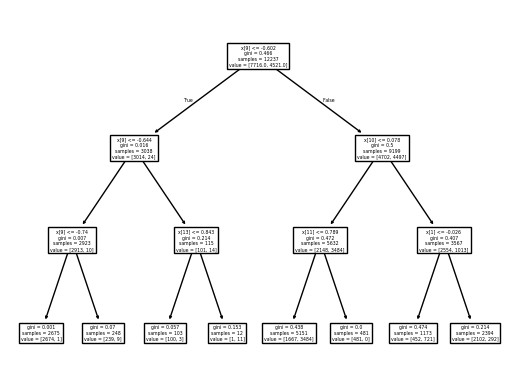

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = Pipeline([
    ("scaler", StandardScaler()),
    ("dtc", DecisionTreeClassifier(max_depth=3))
])
model.fit(X_train, y_train)

plot_tree(model.named_steps["dtc"])
print_eval(X_val, y_val, model)

In [160]:
from sklearn.linear_model import RidgeClassifier

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rc", RidgeClassifier(alpha=0.5))
])
model.fit(X_train, y_train)

print_coefficients(model.named_steps["rc"])
print_eval(X_val, y_val, model)

Coefficients
cap-diameter: 0.16821105216627993
cap-shape: 0.07584005534176924
cap-surface: 0.1269216899292552
cap-color: 0.15908552413095828
does-bruise-or-bleed: -0.08014134192374898
gill-attachment: -0.11229882682400974
gill-spacing: -0.1987267275316262
gill-color: -0.10449964957381111
stem-height: 0.05708669944707378
stem-width: 0.5828143731373588
stem-root: -0.24017847693093727
stem-surface: -0.2583307902695928
stem-color: 0.15910979612963883
veil-color: 0.40973659628888304
has-ring: 0.024310232693188005
ring-type: -0.14929559840286719
spore-print-color: 0.020337915123592204
habitat: 0.09927040378277657
season: 0.009367596470327578
Accuracy/Score: 0.78313
Classification report
              precision    recall  f1-score   support

       False       0.84      0.82      0.83      3933
        True       0.69      0.71      0.70      2186

    accuracy                           0.78      6119
   macro avg       0.76      0.77      0.77      6119
weighted avg       0.78      0.78     

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

kf = KFold(3, shuffle=True, random_state=42)
skf = StratifiedKFold(3, shuffle=True, random_state=42)

model = Pipeline([
    ("scaler", None),
    ("lr", LogisticRegression(solver="saga"))
])
grid = [
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": [None]
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5)
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.2, 0.5]
    }
]
# gs = GridSearchCV(model, grid, cv=skf)
# gs.fit(X, y)
# pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

batch size aiuta tantissimo

In [162]:
from sklearn.neural_network import MLPClassifier

model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(batch_size=50, activation="relu", random_state=42))
])
grid = {
    "mlp__hidden_layer_sizes": [(4, 4), 8],
}
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,2.705885,0.244730,0.006358,0.001928,8,{'mlp__hidden_layer_sizes': 8},1.000000,1.0,0.999755,0.999918,0.000116,1
0,3.409045,0.176284,0.006713,0.000629,"(4, 4)","{'mlp__hidden_layer_sizes': (4, 4)}",0.999755,1.0,0.999019,0.999591,0.000417,2
